In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('projects/data.csv')
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [3]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
dataset.iloc[0]

Unnamed: 0                                                               0
ID                                                                  158023
Name                                                              L. Messi
Age                                                                     31
Photo                       https://cdn.sofifa.org/players/4/19/158023.png
Nationality                                                      Argentina
Flag                                   https://cdn.sofifa.org/flags/52.png
Overall                                                                 94
Potential                                                               94
Club                                                          FC Barcelona
Club Logo                     https://cdn.sofifa.org/teams/2/light/241.png
Value                                                              €110.5M
Wage                                                                 €565K
Special                  

## Simple EDA
- 포지션 별 overall,potential 통계

In [5]:
dataset['Position'].value_counts(dropna=False)
dataset = dataset[pd.notnull(dataset['Position'])]
#Position
positionList = list(dataset.Position.unique())
meanPosO=[] 
meanPosP = []
for pos in positionList:
    tempPos = dataset[dataset.Position == pos]
    meanO = sum(tempPos.Overall)/len(tempPos)
    meanP = sum(tempPos.Potential)/len(tempPos)
    meanPosO.append(meanO)
    meanPosP.append(meanP)
print(meanPosO)
print(meanPosP)

[73.25, 65.53578066914498, 66.61679790026247, 64.60345679012346, 69.076726342711, 73.86666666666666, 69.52216748768473, 69.28398791540785, 69.27088607594936, 65.02474690663666, 69.03292181069959, 66.90396659707724, 66.3132911392405, 70.06280193236715, 69.24074074074075, 66.49644128113879, 71.85714285714286, 66.69223744292238, 65.85476550680787, 69.75403225806451, 66.92972972972973, 63.729555236728835, 66.05886909372579, 72.28571428571429, 65.82432432432432, 64.65517241379311, 66.51282051282051]
[75.4375, 71.11477695167287, 73.1233595800525, 69.79901234567902, 72.52173913043478, 76.6, 72.39901477832512, 72.2296072507553, 72.78481012658227, 70.90776152980878, 72.24691358024691, 72.63987473903967, 71.5042194092827, 72.80676328502416, 72.30864197530865, 71.54359430604983, 72.52380952380952, 71.74611872146119, 70.51815431164901, 72.48387096774194, 73.32972972972973, 70.90530846484936, 70.47405112316034, 72.85714285714286, 72.74324324324324, 69.95402298850574, 70.67948717948718]


Text(0, 0.5, 'mean values')

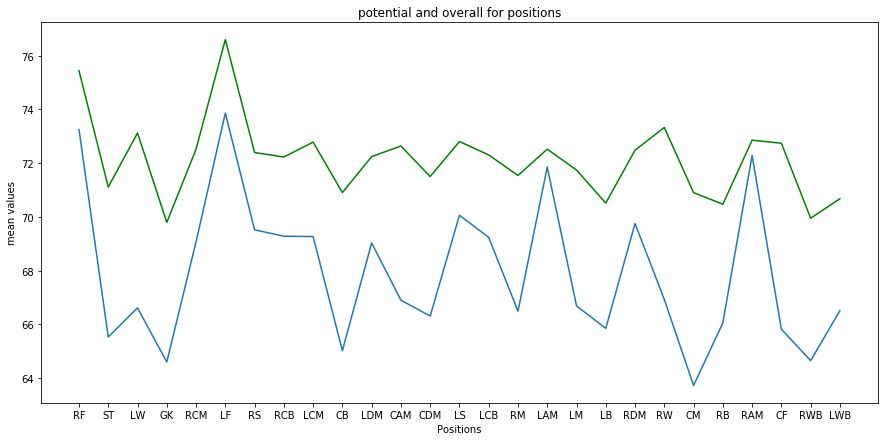

In [6]:
fig = plt.figure(figsize=(15,7))
plt.plot(positionList,meanPosO,label = 'Overall')
plt.plot(positionList,meanPosP,color='green',label = 'Potential')
plt.title('potential and overall for positions')
plt.xlabel('Positions')
plt.ylabel('mean values')

##### 어떤 feature가 wage와 value에 가장 큰 영향을 미칠까?
- 쓸모없는 칼럼을 제거하는 작업을 먼저 해준다.

In [7]:
processed_cols = ['Unnamed: 0','Photo','Flag','Club Logo', 'Special','Body Type','Real Face','Jersey Number','Joined','Loaned From','Contract Valid Until','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
df = dataset.drop(processed_cols, axis=1)

In [8]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,€196.4M


In [9]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 47 columns):
ID                          16643 non-null int64
Name                        16643 non-null object
Age                         16643 non-null int64
Nationality                 16643 non-null object
Overall                     16643 non-null int64
Potential                   16643 non-null int64
Club                        16643 non-null object
Value                       16643 non-null object
Wage                        16643 non-null object
Preferred Foot              16643 non-null object
International Reputation    16643 non-null float64
Weak Foot                   16643 non-null float64
Skill Moves                 16643 non-null float64
Work Rate                   16643 non-null object
Position                    16643 non-null object
Height                      16643 non-null object
Weight                      16643 non-null object
Crossing                    16643 non-null

In [28]:
#근데 일단 wage와 Value에 대한 모델을 만들껀데 해당 칼럼들의 값들이 숫자가 아니라서 이를 숫자로 변환시켜야합니다.
value_suffix = [df.Value.iloc[i][-1] for i in range(len(df.Value))]
wage_suffix = [df.Wage.iloc[i][-1] for i in range(len(df.Value))]

In [29]:
df['Value Factor'] = value_suffix
df['Wage Factor'] = wage_suffix

In [31]:
factors_dict = {'M':1000000,
               'K':1000,
               0:1}

In [32]:
df.replace({'Value Factor': factors_dict}, inplace=True)
df.replace({'Wage Factor': factors_dict}, inplace=True)

In [33]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Value Factor,Wage Factor
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,94.0,94.0,75.0,96.0,33.0,28.0,26.0,€226.5M,1000000,1000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,82.0,85.0,95.0,28.0,31.0,23.0,€127.1M,1000000,1000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,89.0,87.0,81.0,94.0,27.0,24.0,33.0,€228.1M,1000000,1000
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,12.0,68.0,40.0,68.0,15.0,21.0,13.0,€138.6M,1000000,1000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,87.0,94.0,79.0,88.0,68.0,58.0,51.0,€196.4M,1000000,1000


In [34]:
df['Value Factor'] = pd.to_numeric(df['Value Factor']) #str to numeric
df['Wage Factor'] = pd.to_numeric(df['Wage Factor']) #str to numeric

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 49 columns):
ID                          16643 non-null int64
Name                        16643 non-null object
Age                         16643 non-null int64
Nationality                 16643 non-null object
Overall                     16643 non-null int64
Potential                   16643 non-null int64
Club                        16643 non-null object
Value                       16643 non-null object
Wage                        16643 non-null object
Preferred Foot              16643 non-null object
International Reputation    16643 non-null float64
Weak Foot                   16643 non-null float64
Skill Moves                 16643 non-null float64
Work Rate                   16643 non-null object
Position                    16643 non-null object
Height                      16643 non-null object
Weight                      16643 non-null object
Crossing                    16643 non-null

In [37]:
df['Value'] = df['Value'].str.translate(str.maketrans('', '', '€MK')) #'€MK'가 있으면 ''으로 replace해주는 역할
df['Wage'] = df['Wage'].str.translate(str.maketrans('', '', '€MK'))
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Value Factor,Wage Factor
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565,Left,...,94.0,94.0,75.0,96.0,33.0,28.0,26.0,€226.5M,1000000,1000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77,405,Right,...,95.0,82.0,85.0,95.0,28.0,31.0,23.0,€127.1M,1000000,1000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290,Right,...,89.0,87.0,81.0,94.0,27.0,24.0,33.0,€228.1M,1000000,1000
3,193080,De Gea,27,Spain,91,93,Manchester United,72,260,Right,...,12.0,68.0,40.0,68.0,15.0,21.0,13.0,€138.6M,1000000,1000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102,355,Right,...,87.0,94.0,79.0,88.0,68.0,58.0,51.0,€196.4M,1000000,1000


In [38]:
df['Value'] = pd.to_numeric(df['Value']) #마찬가지로 str을 int로바꿔주구
df['Wage'] = pd.to_numeric(df['Wage'])
#이제 wage value factor들에 곱해줘버립니다.
df['Value'] = df['Value'] * df['Value Factor']
df['Wage'] = df['Wage'] * df['Wage Factor']

#이제 곱셈을위해만든 칼럼 삭제를 하구요
df.drop(['Value Factor','Wage Factor'],axis = 1, inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000,Left,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000,Right,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000,Right,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000,Right,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000,Right,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,€196.4M


## Simple Linear Regression
- 먼저 이론적으로 선수의 가치에 가장 연관성이 높을것 같은 Overall을 기준으로 모델을 build해봅니다.

In [39]:
X = df.loc[:,'Overall'].values
y_wage = df.loc[:,'Wage'].values
y_value = df.loc[:,'Value'].values
X = np.expand_dims(X,axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X_wage_train, X_wage_test, y_wage_train, y_wage_test = train_test_split(X, y_wage, test_size = 0.2, random_state = 0)
X_value_train, X_value_test, y_value_train, y_value_test = train_test_split(X, y_value, test_size = 0.2, random_state = 0)

In [43]:
from sklearn.linear_model import LinearRegression
SL_regressor_forWage = LinearRegression()
SL_regressor_forValue = LinearRegression()
SL_regressor_forWage.fit(X_wage_train,y_wage_train)
SL_regressor_forValue.fit(X_value_train,y_value_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_wage_pred = SL_regressor_forWage.predict(X_wage_test)
y_value_pred = SL_regressor_forValue.predict(X_value_test)

Text(0.5, 1.0, 'wage model(train)')

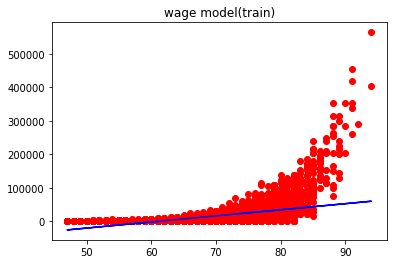

In [47]:
plt.scatter(X_wage_train,y_wage_train, color = 'red')
plt.plot(X_wage_train,SL_regressor_forWage.predict(X_wage_train),color = 'blue')
plt.title('wage model(train)')

Text(0.5, 1.0, 'wage model(test)')

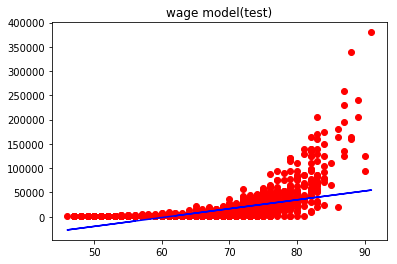

In [48]:
plt.scatter(X_wage_test, y_wage_test, color='red')
plt.plot(X_wage_test,y_wage_pred,color='blue')
plt.title('wage model(test)')

Text(0.5, 1.0, 'value model(train)')

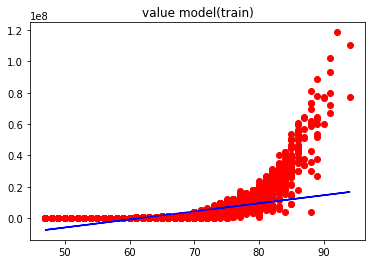

In [49]:
plt.scatter(X_value_train,y_value_train, color = 'red')
plt.plot(X_value_train,SL_regressor_forValue.predict(X_value_train),color = 'blue')
plt.title('value model(train)')

Text(0.5, 1.0, 'value model(test)')

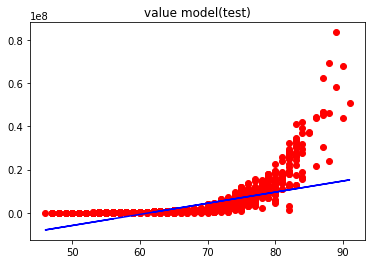

In [50]:
plt.scatter(X_value_test, y_value_test, color='red')
plt.plot(X_value_test,y_value_pred,color='blue')
plt.title('value model(test)')

array([16746432.02452781])

##### 예상대로 평범한 Linear Regression으론 좋은 fit을 가지는 모델을 만들기 힘들었다.
- 하지만 플롯을 통해 wage보다 value가 overall을 기준으로 더 잘 관계성이 적용되어있는 것을 유추 가능

In [56]:
X_rf = df.loc[:,['Potential','Overall','Age','International Reputation','Weak Foot','Skill Moves','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']].values

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_wage_regressor = RandomForestRegressor(n_estimators=100)
rf_value_regressor = RandomForestRegressor(n_estimators=100)
X_wage_train, X_wage_test, y_wage_train, y_wage_test = train_test_split(X_rf, y_wage, test_size = 0.2, random_state = 0)
X_value_train, X_value_test, y_value_train, y_value_test = train_test_split(X_rf, y_value, test_size = 0.2, random_state = 0)
rf_wage_regressor.fit(X_wage_train,y_wage_train)
rf_value_regressor.fit(X_value_train,y_value_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
messi = df[df['Name'] == 'L. Messi'].loc[:,['Potential','Overall','Age','International Reputation','Weak Foot','Skill Moves','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']].values

In [74]:
#리오넬 메시(Overall 94)의 시장가치를 Linear Regression모델로 predict 해보죠 
print('Linear Regressor says Lionel Messi worth about €',np.asscalar(SL_regressor_forValue.predict([[94]])))
#동일한방법으로 메시의 시장가치를 랜덤포레스트 모델로 예측해봅시다.
print('Random Forest Regressor says Lionel Messi worth about €',np.asscalar(rf_value_regressor.predict(messi)))

Linear Regressor says Lionel Messi worth about € 16746432.024527814
Random Forest Regressor says Lionel Messi worth about € 103370000.0
